In [72]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import time

%matplotlib inline

In [52]:
datain = np.loadtxt('18a_input.txt',comments=None,delimiter='\n',dtype=str)#,usecols=(0,2))#,delimiter=' ')
#datain = np.loadtxt('18a_input_test.txt',comments=None,delimiter='\n',dtype=str)#,usecols=(0,2))#,delimiter=' ')#

In [61]:
arrdatain = np.zeros((len(datain[0])+2,len(datain)+2)).astype(int).astype(str)
print(arrdatain.shape)

#convert datain to np array
for i in range(1,arrdatain.shape[0]-1):
    for j in range(1,arrdatain.shape[1]-1):
        arrdatain[i,j] = datain[i-1][j-1]
        if arrdatain[i,j] == '.':
            arrdatain[i,j] = 1
        elif arrdatain[i,j] == '|':
            arrdatain[i,j] = 2
        else:
            arrdatain[i,j] = 3
        
arrdatain.T

(52, 52)


array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '3', '3', ..., '1', '1', '0'],
       ['0', '2', '2', ..., '3', '1', '0'],
       ...,
       ['0', '1', '1', ..., '2', '1', '0'],
       ['0', '3', '1', ..., '1', '1', '0'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype='<U21')

In [58]:
#define a function to compile surrounding cells into a string
def neighbours(array,x,y):
    string = ''
    string = array[x-1,y-1]+array[x,y-1]+array[x+1,y-1]+array[x-1,y]+array[x+1,y]+array[x-1,y+1]+array[x,y+1]+array[x+1,y+1]
    return string

In [94]:
# cycle through the array, only considering cells of interest
array_old = np.copy(arrdatain)

arr_value = []

for loop in range(1000):
    array_new = np.copy(array_old)
    
    for coords in np.argwhere(array_old == '1'):
        if neighbours(array_old,coords[0],coords[1]).count('2') > 2:
            array_new[coords[0],coords[1]] = '2'
            
    for coords in np.argwhere(array_old == '2'):
        if neighbours(array_old,coords[0],coords[1]).count('3') > 2:
            array_new[coords[0],coords[1]] = '3'
            
    for coords in np.argwhere(array_old == '3'):
        if neighbours(array_old,coords[0],coords[1]).count('3') > 0 and neighbours(array_old,coords[0],coords[1]).count('2') > 0:
            array_new[coords[0],coords[1]] = '3'
        else:
            array_new[coords[0],coords[1]] = '1'
    
    #if loop > 900 and loop%10 == 0:
        
        #value = len(np.argwhere(array_new == '2')) * len(np.argwhere(array_new == '3'))
        
        #im = plt.figure(figsize=(4,4))
        #ax = plt.gca()
        #plt.imshow(array_new.astype(float).T)
        #ax.set_title(value)
    
    if loop > 900:
        value = len(np.argwhere(array_new == '2')) * len(np.argwhere(array_new == '3'))
        if len(arr_value) < 1:
            arr_value = np.expand_dims(np.array([loop,value]),axis=0)
        else:
            arr_value = np.append(arr_value,np.expand_dims(np.array([loop,value]),axis=0),axis=0)
    
    array_old = np.copy(array_new)

#print(arrdatain[1:-1,1:-1])
#print(array_new[1:-1,1:-1])

In [63]:
wood = len(np.argwhere(array_new == '2'))
lumberyards = len(np.argwhere(array_new == '3'))
print('value is',wood*lumberyards)

value is 495236


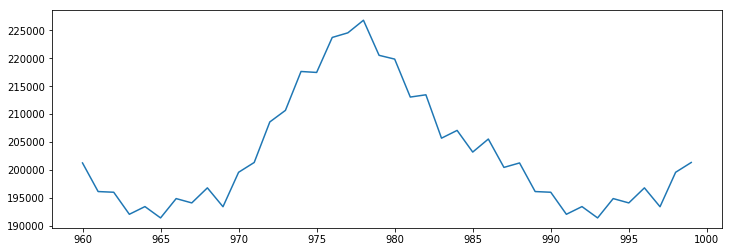

In [109]:
m = plt.figure(figsize=(12,4))
plt.plot(arr_value[-40:,0],arr_value[-40:,1])

In [117]:
arr_value[98],arr_value[70],arr_value[42]

(array([   999, 201348]), array([   971, 201348]), array([   943, 201348]))

The thousandth minute is the same as the 972nd minute. The value cycle repeats every 28 minutes.

How many minutes more than a complete cycle in 1 000 000 000?

In [118]:
last = 1000000000
(last - 1000)%28

0

Since 28 goes evenly into 999 999 000, the value will be the same as it was at the 1000th minute: 201348